In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline 

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, OrthogonalMatchingPursuit
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor, KernelDensity, KDTree
from sklearn.metrics import *

import sys, os
import random 

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import statement
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

In [611]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\covid19.csv")

In [613]:
print(df)

    Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN         Western Sahara  24.215500 -12.885800        0   
262            NaN  Sao Tome and Principe   0.186360   6.613081        0   
263            NaN                  Yemen  15.552727  48.516388        0   
264            NaN                Comoros -11.645500  43.333300        0   
265            NaN             Tajikistan  38.861034  71.276093        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/24/20  4/25/20  \
0          0

In [351]:
df2=df.dropna()

In [353]:
df2.drop(["Lat", "Long"], axis=1, inplace=True) 
print(df2)


                       Province/State  Country/Region  1/22/20  1/23/20  \
8        Australian Capital Territory       Australia        0        0   
9                     New South Wales       Australia        0        0   
10                 Northern Territory       Australia        0        0   
11                         Queensland       Australia        0        0   
12                    South Australia       Australia        0        0   
..                                ...             ...      ...      ...   
250            British Virgin Islands  United Kingdom        0        0   
251          Turks and Caicos Islands  United Kingdom        0        0   
256  Bonaire, Sint Eustatius and Saba     Netherlands        0        0   
258       Falkland Islands (Malvinas)  United Kingdom        0        0   
259         Saint Pierre and Miquelon          France        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  ...  4/24/20  \
8          0        0   

C:\Users\DELL\AppData\Local\Temp\ipykernel_11860\882631526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["Lat", "Long"], axis=1, inplace=True)


In [355]:
df2.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Sum_infection,Max_infection,Min_infection
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,105,106,106,106,106,106,106,3607,106,0
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2982,2994,3002,3004,3016,3016,3025,100457,3025,0
10,Northern Territory,Australia,0,0,0,0,0,0,0,0,...,28,28,28,28,28,28,28,941,28,0
11,Queensland,Australia,0,0,0,0,0,0,0,1,...,1026,1026,1030,1033,1034,1033,1033,35722,1034,0
12,South Australia,Australia,0,0,0,0,0,0,0,0,...,438,438,438,438,438,438,438,15467,438,0


In [357]:
df2.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Sum_infection,Max_infection,Min_infection
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,8.200000e+01,82.000000,82.000000
mean,6.682927,7.841463,11.219512,17.146341,25.365854,35.158537,67.268293,74.329268,99.414634,119.695122,...,1687.548780,1706.219512,1727.097561,1746.597561,1766.841463,1788.109756,1808.975610,9.727145e+04,1808.987805,6.682927
std,49.025788,49.087342,60.937334,84.604399,118.029345,158.874628,392.474425,394.039951,543.395542,644.015483,...,7995.711229,8027.023176,8067.889008,8107.802474,8147.859729,8191.415995,8237.544628,6.050628e+05,8237.543466,49.025788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.750000,39.750000,39.750000,39.750000,39.750000,39.750000,39.750000,1.635500e+03,39.750000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,8.268500e+03,186.000000,0.000000
75%,1.000000,2.000000,3.750000,8.750000,13.750000,20.250000,31.500000,35.250000,39.500000,45.750000,...,589.500000,589.500000,589.500000,589.500000,589.500000,589.500000,589.500000,3.823225e+04,589.500000,1.000000
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,68128.000000,68128.000000,68128.000000,68128.000000,68128.000000,68128.000000,68128.000000,5.475930e+06,68128.000000,444.000000


In [359]:
df2.max()

Province/State          Zhejiang
Country/Region    United Kingdom
1/22/20                      444
1/23/20                      444
1/24/20                      549
                       ...      
4/29/20                    68128
4/30/20                    68128
Sum_infection            5475930
Max_infection              68128
Min_infection                444
Length: 105, dtype: object

In [361]:
print(df2.shape)

(82, 105)


In [363]:
data_aggregated = df2.groupby("Country/Region").sum()

In [365]:
data_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Sum_infection,Max_infection,Min_infection
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,Australian Capital TerritoryNew South WalesNor...,0,0,0,0,4,5,5,6,9,...,6677,6694,6714,6721,6744,6752,6766,224354,6767,0
Canada,AlbertaBritish ColumbiaGrand PrincessManitobaN...,0,0,0,0,1,1,2,2,2,...,44919,46371,48033,49616,51150,52865,54457,982149,54457,0
China,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,548,643,920,1406,2075,2877,5509,6087,8141,...,83899,83909,83912,83918,83940,83944,83956,6686938,83956,548
Denmark,Faroe IslandsGreenland,0,0,0,0,0,0,0,0,0,...,198,198,198,198,198,198,198,7755,198,0
France,French GuianaFrench PolynesiaGuadeloupeMayotte...,0,0,0,0,0,0,0,0,0,...,1316,1352,1373,1374,1448,1450,1535,39481,1535,0


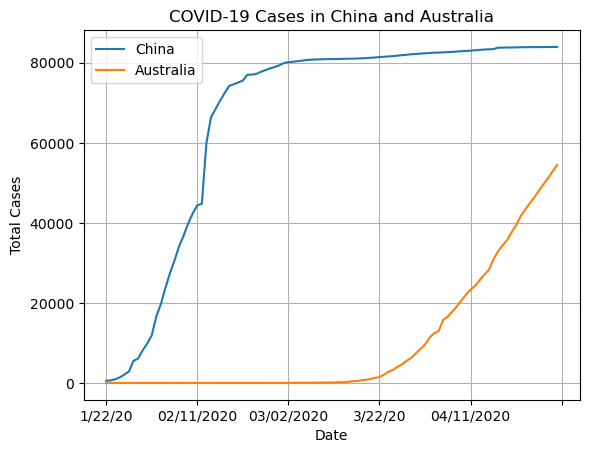

In [367]:
data_aggregated.loc["China"][1:101].plot(label='China')  
data_aggregated.loc["Canada"][1:101].plot(label='Australia')

plt.legend()
plt.title('COVID-19 Cases in China and Australia')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)

plt.show()

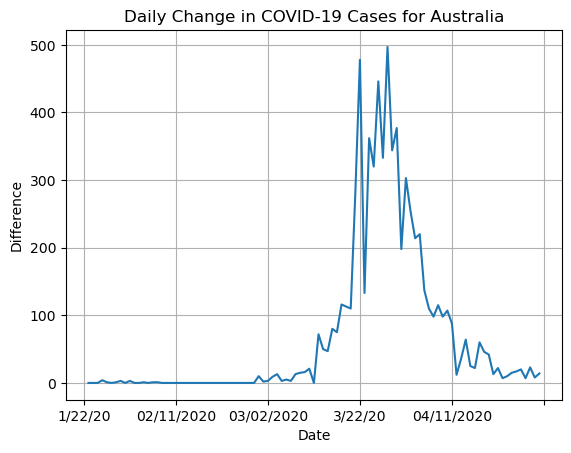

In [369]:
data_aggregated = data_aggregated.apply(pd.to_numeric, errors='coerce')

data_aggregated.ffill(inplace=True)
data_aggregated.loc['Australia','1/22/20':'4/30/20'].diff().plot()


plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Daily Change in COVID-19 Cases for Australia')

plt.grid(True)
plt.show()

In [621]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Sum_infection,Max_infection,Min_infection
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,28462,2171,0
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,678,712,726,736,750,766,773,17864,773,0
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,74325,4006,0
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,731,738,738,743,743,743,745,21893,745,0
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,26,27,27,27,27,649,27,0


In [631]:
geograph=px.density_mapbox( df,
    lat='Lat',
    lon='Long',
    z='Country/Region',
    radius=10,
    center=dict(lat=df['Lat'].mean(), lon=df['Long'].mean()),
    zoom=10,
    mapbox_style="open-street-map",  # Using the Open Street Map style
    color_continuous_scale=px.colors.sequential.Plasma,  # A visually appealing color scale
    title='Geographical Distribution of Property '
)
# Update layout for a better visual design
geograph.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    paper_bgcolor='rgba(10, 10, 10, 1)',  # Set a dark background for the paper
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="white"
    )
)

# Display the updated

In [371]:
datahap=pd.read_csv(r"C:\Users\DELL\Downloads\worldhappiness.csv")
datahap.head()


,Overall rank,Country/region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [373]:
waste = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]


In [375]:
datahap.drop(waste,axis=1, inplace=True)


In [377]:
datahap

,Country/region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [379]:
datahap.corr

<bound method DataFrame.corr of                Country/region  GDP per capita  Social support  \
0                     Finland           1.340           1.587   
1                     Denmark           1.383           1.573   
2                      Norway           1.488           1.582   
3                     Iceland           1.380           1.624   
4                 Netherlands           1.396           1.522   
..                        ...             ...             ...   
151                    Rwanda           0.359           0.711   
152                  Tanzania           0.476           0.885   
153               Afghanistan           0.350           0.517   
154  Central African Republic           0.026           0.000   
155               South Sudan           0.306           0.575   

     Healthy life expectancy  Freedom to make life choices  
0                      0.986                         0.596  
1                      0.996                         0.592  
2   

In [381]:
datahap.head()

,Country/region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


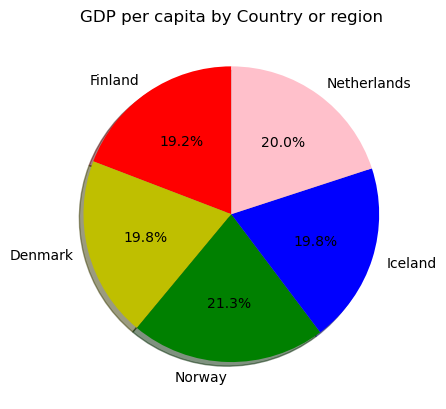

In [385]:
df3 = pd.DataFrame(datahap.head())

# Plotting the pie chart
colors = ['r', 'y', 'g', 'b','pink']  # Ensure valid color names
  # Highlight the third slice, must match the number of slices

plt.pie(df3['GDP per capita'], labels=df3['Country/region'], colors=colors, 
        startangle=90, shadow=True, radius=1, autopct='%1.1f%%')


# Showing the plot
plt.title('GDP per capita by Country or region')
plt.show()



In [387]:
df2

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Sum_infection,Max_infection,Min_infection
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,105,106,106,106,106,106,106,3607,106,0
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2982,2994,3002,3004,3016,3016,3025,100457,3025,0
10,Northern Territory,Australia,0,0,0,0,0,0,0,0,...,28,28,28,28,28,28,28,941,28,0
11,Queensland,Australia,0,0,0,0,0,0,0,1,...,1026,1026,1030,1033,1034,1033,1033,35722,1034,0
12,South Australia,Australia,0,0,0,0,0,0,0,0,...,438,438,438,438,438,438,438,15467,438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,British Virgin Islands,United Kingdom,0,0,0,0,0,0,0,0,...,5,6,6,6,6,6,6,130,6,0
251,Turks and Caicos Islands,United Kingdom,0,0,0,0,0,0,0,0,...,11,11,11,12,12,12,12,300,12,0
256,"Bonaire, Sint Eustatius and Saba",Netherlands,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,101,5,0
258,Falkland Islands (Malvinas),United Kingdom,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,239,13,0


In [389]:
data_aggregated.loc['Australia','1/22/20':'4/30/20'].diff().max()

497.0

In [391]:
data_aggregated.loc['Australia','1/22/20':'4/30/20'].diff().sum()

6766.0

In [393]:
print(df2.columns)

Index(['Province/State', 'Country/Region', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       ...
       '4/24/20', '4/25/20', '4/26/20', '4/27/20', '4/28/20', '4/29/20',
       '4/30/20', 'Sum_infection', 'Max_infection', 'Min_infection'],
      dtype='object', length=105)


In [399]:
if 'Country/region' in datahap.columns:
    datahap.set_index('Country/region', inplace=True)
elif 'Country or region' in datahap.columns:
    datahap.set_index('Country/region', inplace=True)
else:
   print(datahap)

                          GDP per capita  Social support  \
Country/region                                             
Finland                            1.340           1.587   
Denmark                            1.383           1.573   
Norway                             1.488           1.582   
Iceland                            1.380           1.624   
Netherlands                        1.396           1.522   
...                                  ...             ...   
Rwanda                             0.359           0.711   
Tanzania                           0.476           0.885   
Afghanistan                        0.350           0.517   
Central African Republic           0.026           0.000   
South Sudan                        0.306           0.575   

                          Healthy life expectancy  \
Country/region                                      
Finland                                     0.986   
Denmark                                     0.996   
Norway 

In [401]:
data_aggregated = data_aggregated.apply(pd.to_numeric, errors='coerce')

if 'max_infection_rate' not in data_aggregated.columns:
    data_aggregated['max_infection_rate'] = pd.Series([None] * len(data_aggregated))

for country in data_aggregated.index:
    max_infection_rate = data_aggregated.loc[country].diff().max()
    data_aggregated.at[country, 'max_infection_rate'] = max_infection_rate

# ตรวจสอบค่าในคอลัมน์ 'Max_infection'
print(data_aggregated[['max_infection_rate']].head())

               max_infection_rate
Country/Region                   
Australia                  217588
Canada                     927692
China                     6602982
Denmark                      7557
France                      37946


In [581]:
data_aggregated[['max_infection_rate']].head()

,max_infection_rate
Country/Region,
Australia,217588
Canada,927692
China,6602982
Denmark,7557
France,37946


In [583]:
# รวมข้อมูลสอง DataFrame โดยใช้คอลัมน์ 'GDP per capita' และ 'max_infection_rate'
merged_data = pd.merge(data_aggregated[['max_infection_rate']]/10**6, datahap, left_index=True, right_index=True, how='inner')
plot_data = merged_data.dropna()

In [585]:
print(plot_data.shape)

(7, 5)


In [587]:
plot_data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Australia,0.217588,1.372,1.548,1.036,0.557
Canada,0.927692,1.365,1.505,1.039,0.584
China,6.602982,1.029,1.125,0.893,0.521
Denmark,0.007557,1.383,1.573,0.996,0.592
France,0.037946,1.324,1.472,1.045,0.436


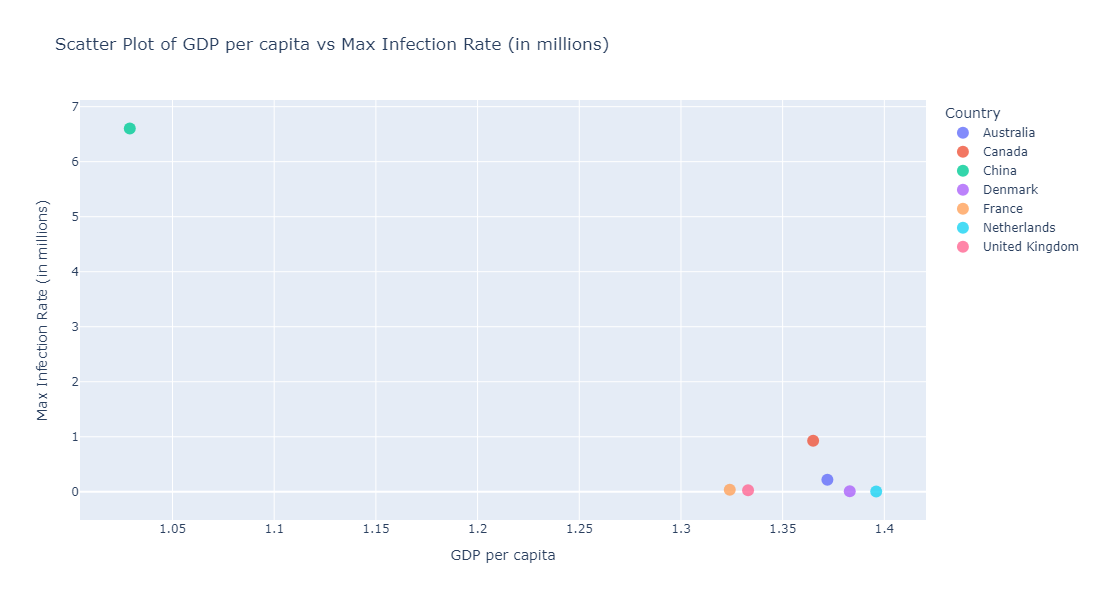

In [589]:
fig = px.scatter(
    plot_data,
    x='GDP per capita',
    y='max_infection_rate',
    labels={
        'GDP per capita': 'GDP per capita',
        'max_infection_rate': 'Max Infection Rate (in millions)'
    },
    title='Scatter Plot of GDP per capita vs Max Infection Rate (in millions)',
    color=plot_data.index
)

fig.update_layout(
    autosize=False,
    width=1000,  
    height=600,  
    legend_title_text='Country'
)

fig.update_traces(marker=dict(size=12, opacity=0.8), selector=dict(mode='markers'))
fig.update_layout(showlegend=True)

fig.show()

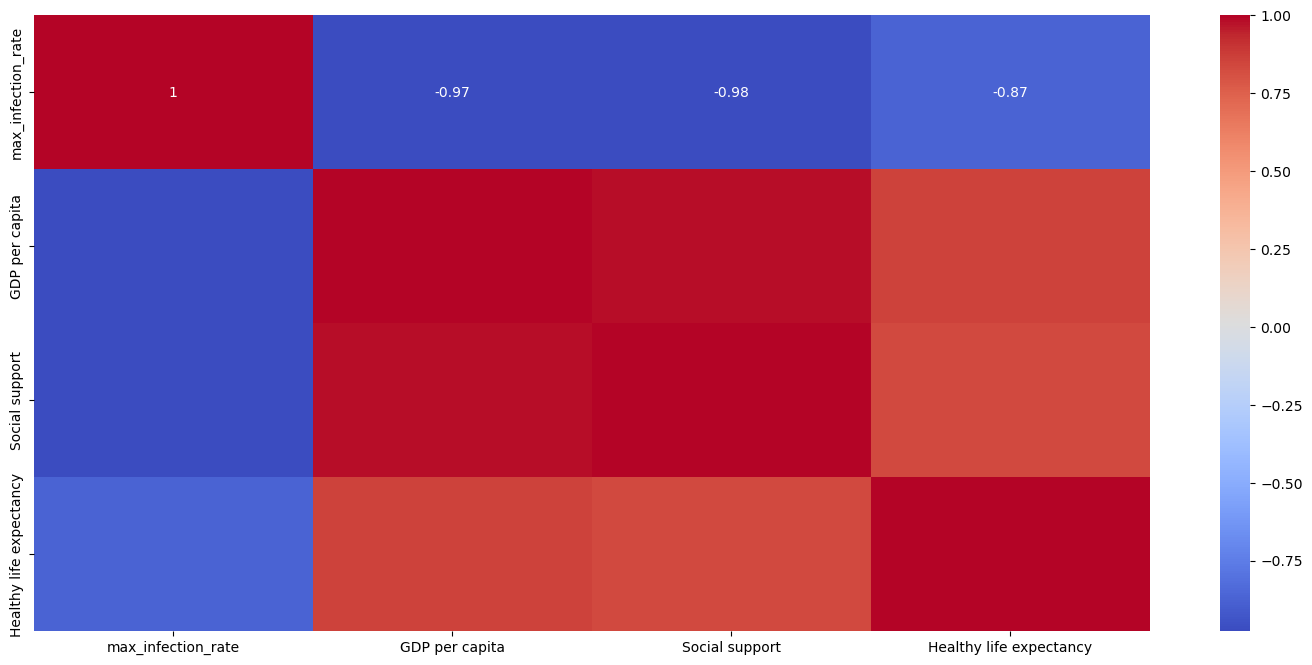

In [599]:
corr = plot_data[['max_infection_rate','GDP per capita','Social support','Healthy life expectancy']].corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',linecolor='cyan',cbar=True)
plt.show()